### Stock _Market_Predictor

In [ ]:

import pandas_datareader as pdr
key="d7b260c94da6b7ef3a5b8ae6f6d208f189da28e2"

In [2]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

In [3]:
df.to_csv('TSLA.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('TSLA.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2016-08-22 00:00:00+00:00,222.93,225.110,222.68,224.17,2065493,44.586,45.022,44.536,44.834,10327465,0.0,1.0
1,TSLA,2016-08-23 00:00:00+00:00,224.84,228.490,222.80,224.32,4784418,44.968,45.698,44.560,44.864,23922090,0.0,1.0
2,TSLA,2016-08-24 00:00:00+00:00,222.62,227.150,222.22,227.05,2570693,44.524,45.430,44.444,45.410,12853465,0.0,1.0
3,TSLA,2016-08-25 00:00:00+00:00,220.96,223.800,220.77,223.11,1762519,44.192,44.760,44.154,44.622,8812595,0.0,1.0
4,TSLA,2016-08-26 00:00:00+00:00,219.99,222.855,218.82,222.14,2238992,43.998,44.571,43.764,44.428,11194960,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TSLA,2021-08-13 00:00:00+00:00,717.17,729.90,714.34,723.7100,16671844,717.17,729.90,714.34,723.7100,16671844,0.0,1.0
1254,TSLA,2021-08-16 00:00:00+00:00,686.17,709.50,676.40,705.0700,23103303,686.17,709.50,676.40,705.0700,23103303,0.0,1.0
1255,TSLA,2021-08-17 00:00:00+00:00,665.71,674.58,648.84,672.6600,23721279,665.71,674.58,648.84,672.6600,23721279,0.0,1.0
1256,TSLA,2021-08-18 00:00:00+00:00,688.99,695.77,669.35,669.7479,20349375,688.99,695.77,669.35,669.7479,20349375,0.0,1.0
1257,TSLA,2021-08-19 00:00:00+00:00,673.47,686.55,667.59,678.2100,14313486,673.47,686.55,667.59,678.2100,14313486,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       222.93
1       224.84
2       222.62
3       220.96
4       219.99
         ...  
1253    717.17
1254    686.17
1255    665.71
1256    688.99
1257    673.47
Name: close, Length: 1258, dtype: float64

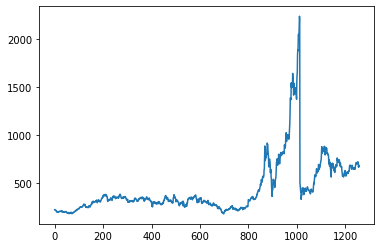

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
df1

0       222.93
1       224.84
2       222.62
3       220.96
4       219.99
         ...  
1253    717.17
1254    686.17
1255    665.71
1256    688.99
1257    673.47
Name: close, Length: 1258, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.02134209]
 [0.02226937]
 [0.02119158]
 ...
 [0.23630679]
 [0.24760897]
 [0.24007418]]


In [15]:

training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(880, 378)

In [17]:
train_data

array([[0.02134209],
       [0.02226937],
       [0.02119158],
       [0.02038567],
       [0.01991475],
       [0.01758926],
       [0.01571527],
       [0.01604055],
       [0.01058365],
       [0.00913204],
       [0.01158376],
       [0.01104001],
       [0.00892814],
       [0.00752508],
       [0.0093845 ],
       [0.00829215],
       [0.00846692],
       [0.01041373],
       [0.01283147],
       [0.01328783],
       [0.0124625 ],
       [0.01274408],
       [0.01333152],
       [0.01382672],
       [0.01457437],
       [0.01303052],
       [0.01325384],
       [0.01054967],
       [0.01216635],
       [0.01686102],
       [0.01574925],
       [0.01431706],
       [0.01069532],
       [0.00856402],
       [0.01067104],
       [0.01025838],
       [0.01094292],
       [0.01032635],
       [0.00851547],
       [0.00727748],
       [0.00977289],
       [0.01193817],
       [0.00977289],
       [0.01025352],
       [0.01154978],
       [0.01134587],
       [0.01129732],
       [0.012

In [18]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [22]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 7s 274ms/step - loss: 0.0021 - val_loss: 0.0432
Epoch 2/100
13/13 [==============================] - 2s 150ms/step - loss: 8.6806e-04 - val_loss: 0.0184
Epoch 3/100
13/13 [==============================] - 2s 160ms/step - loss: 3.8523e-04 - val_loss: 0.0501
Epoch 4/100
13/13 [==============================] - 2s 162ms/step - loss: 2.8745e-04 - val_loss: 0.0361
Epoch 5/100
13/13 [==============================] - 2s 151ms/step - loss: 2.3958e-04 - val_loss: 0.0595
Epoch 6/100
13/13 [==============================] - 2s 149ms/step - loss: 2.0319e-04 - val_loss: 0.0612
Epoch 7/100
13/13 [==============================] - 2s 146ms/step - loss: 1.9959e-04 - val_loss: 0.0812
Epoch 8/100
13/13 [==============================] - 2s 144ms/step - loss: 1.7532e-04 - val_loss: 0.0973
Epoch 9/100
13/13 [==============================] - 2s 144ms/step - loss: 1.6556e-04 - val_loss: 0.0933
Epoch 10/100
13/13 [==============================] - 2s 14

13/13 [==============================] - 2s 153ms/step - loss: 8.2990e-05 - val_loss: 0.0231
Epoch 79/100
13/13 [==============================] - 2s 158ms/step - loss: 8.5799e-05 - val_loss: 0.0194
Epoch 80/100
13/13 [==============================] - 2s 155ms/step - loss: 7.1193e-05 - val_loss: 0.0179
Epoch 81/100
13/13 [==============================] - 2s 166ms/step - loss: 7.1619e-05 - val_loss: 0.0197
Epoch 82/100
13/13 [==============================] - 2s 163ms/step - loss: 6.7249e-05 - val_loss: 0.0201
Epoch 83/100
13/13 [==============================] - 2s 172ms/step - loss: 6.7063e-05 - val_loss: 0.0164
Epoch 84/100
13/13 [==============================] - 2s 164ms/step - loss: 6.9878e-05 - val_loss: 0.0163
Epoch 85/100
13/13 [==============================] - 2s 160ms/step - loss: 7.4130e-05 - val_loss: 0.0162
Epoch 86/100
13/13 [==============================] - 2s 169ms/step - loss: 7.5255e-05 - val_loss: 0.0171
Epoch 87/100
13/13 [==============================] - 2s 16

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.6.0'

In [30]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

329.889617304712

In [33]:

math.sqrt(mean_squared_error(ytest,test_predict))

941.3187227288045

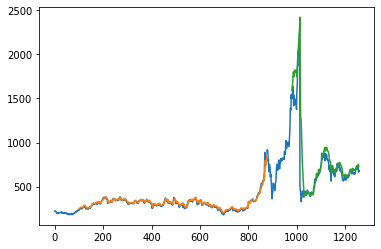

In [34]:

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

378

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 37)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.2436133956053559,
 0.24309877753934883,
 0.24223460757945015,
 0.24271038654613591,
 0.23333074406004523,
 0.22608239714921008,
 0.23004398527998127,
 0.23205390866985792,
 0.24601170998844535,
 0.23768072318402927,
 0.23032071386264547,
 0.22897105516123079,
 0.22587363699035817,
 0.22684461447339033,
 0.23377739370224,
 0.2312479973589412,
 0.2283205002475992,
 0.22546582644748464,
 0.2323791861266737,
 0.22614551068560712,
 0.22721358591694257,
 0.241957878996786,
 0.24673994310071945,
 0.25764887512258583,
 0.257682859334492,
 0.25825573604948093,
 0.2600568992805056,
 0.25251725912476086,
 0.2596345240753866,
 0.25780423151987103,
 0.2567507209507811,
 0.2637563234908582,
 0.26129004068395645,
 0.24623988969695787,
 0.23630679004553884,
 0.24760896794803322,
 0.2400741826797036]

In [39]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: cannot reshape array of size 37 into shape (1,100,1)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)